# SMS Spam Detection - classification

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
nltk.download('all')  # Important for the funtioning of nltk Library
import pickle

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Krish\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Krish\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Krish\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Krish\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Krish\AppData\Roaming\nltk_data...
[

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
131,ham,"Dear, will call Tmorrow.pls accomodate.",NaN,NaN,NaN
3026,ham,You still at the game?,NaN,NaN,NaN
4262,ham,Den only weekdays got special price... Haiz......,NaN,NaN,NaN
5165,ham,�� still got lessons? �� in sch?,NaN,NaN,NaN
4957,ham,Why didn't u call on your lunch?,NaN,NaN,NaN
1660,ham,No just send to you. Bec you in temple na.,NaN,NaN,NaN
1703,ham,Just taste fish curry :-P,NaN,NaN,NaN
1784,ham,"Dont search love, let love find U. Thats why i...",NaN,NaN,NaN
2188,spam,FREE camera phones with linerental from 4.49/m...,NaN,NaN,NaN
2757,ham,Yo we are watching a movie on netflix,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

### Project stages
- #### Data Cleaning
- #### EDA
- #### Text Preproccesing
- #### Model Building
- #### Model Evaluation
- #### Improvement
- #### Deploy


## 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df = df.drop(df.columns[2:], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df1 = df.rename(columns={'v1':'target', 'v2':'text'})
df1

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Encoding the target categorical variables with binary values
encoder = LabelEncoder()
df1['target'] = encoder.fit_transform(df1['target'])
df1

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [10]:
df1.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df1.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df1.duplicated().sum()

np.int64(403)

In [13]:
df2 = df1.drop_duplicates(keep='first')
df2.duplicated().sum()

np.int64(0)

## 2.EDA

In [14]:
df2.value_counts('target')

target
0    4516
1     653
Name: count, dtype: int64

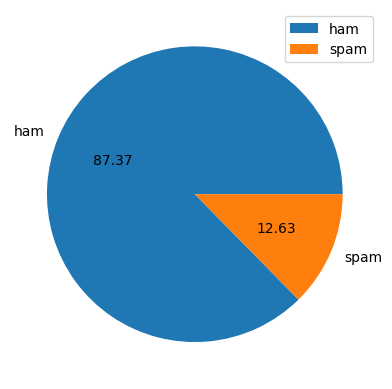

In [15]:
plt.pie(df2.value_counts('target'), labels=['ham', 'spam'], autopct='%0.2f')
plt.legend()
plt.show()

In [16]:
df2['chars'] = df2['text'].apply(len)
df2

C:\Users\Krish\AppData\Local\Temp\ipykernel_8900\58625718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['chars'] = df2['text'].apply(len)


,target,text,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [17]:
df2['words'] = df2['text'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))
df2

C:\Users\Krish\AppData\Local\Temp\ipykernel_8900\3228244774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['words'] = df2['text'].apply(lambda x:len(nltk.wordpunct_tokenize(x)))


,target,text,chars,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,41
5568,0,Will �_ b going to esplanade fr home?,37,10
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,28


In [18]:
df2['sentence'] = df2['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Krish\AppData\Local\Temp\ipykernel_8900\2717004514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentence'] = df2['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [19]:
df2

,target,text,chars,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,41,4
5568,0,Will �_ b going to esplanade fr home?,37,10,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,28,1


In [20]:
df2.drop(columns=['target']).describe()

,chars,words,sentence
count,5169.000000,5169.000000,5169.000000
mean,78.924163,19.174502,1.966531
std,58.175349,13.913589,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,28.000000,2.000000
max,910.000000,210.000000,38.000000


In [21]:
# ham
df2[df2['target']==0].drop(columns=['target']).describe()

,chars,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.472099,1.820195
std,56.357463,13.774207,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,210.000000,38.000000


In [22]:
# spam
df2[df2['target']==1].drop(columns=['target']).describe()

,chars,words,sentence
count,653.000000,653.000000,653.000000
mean,137.479326,30.947933,2.978560
std,30.014336,7.855504,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,28.000000,2.000000
50%,148.000000,32.000000,3.000000
75%,157.000000,36.000000,4.000000
max,223.000000,49.000000,9.000000


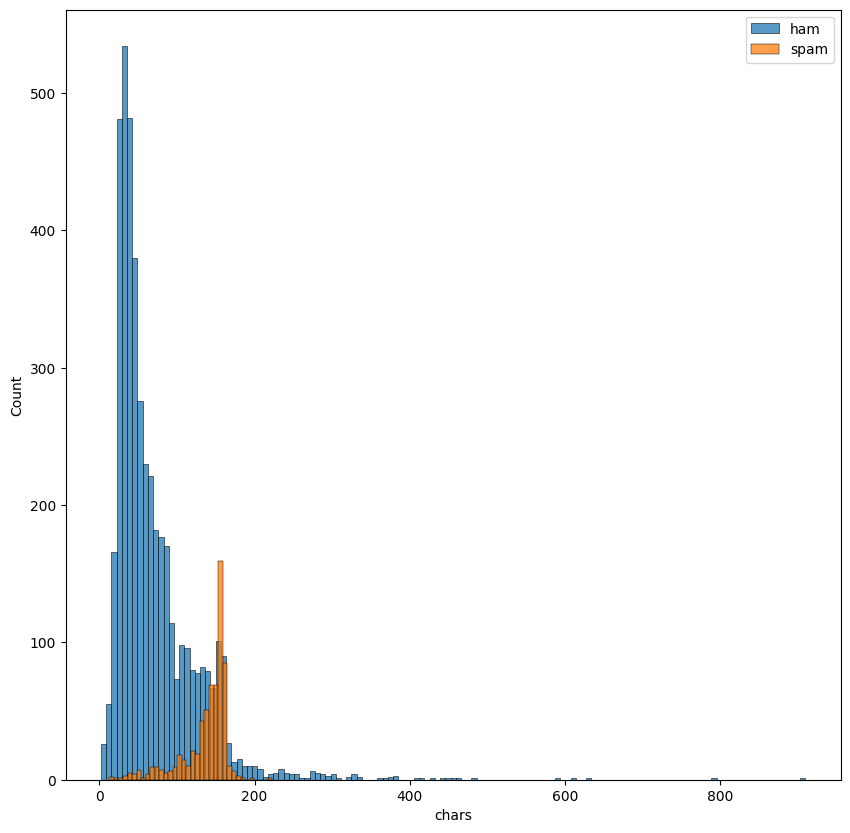

In [23]:
plt.figure(figsize=(10,10))
sns.histplot(df2[df2['target']==0]['chars'])
sns.histplot(df2[df2['target']==1]['chars'])
plt.legend(['ham','spam'])

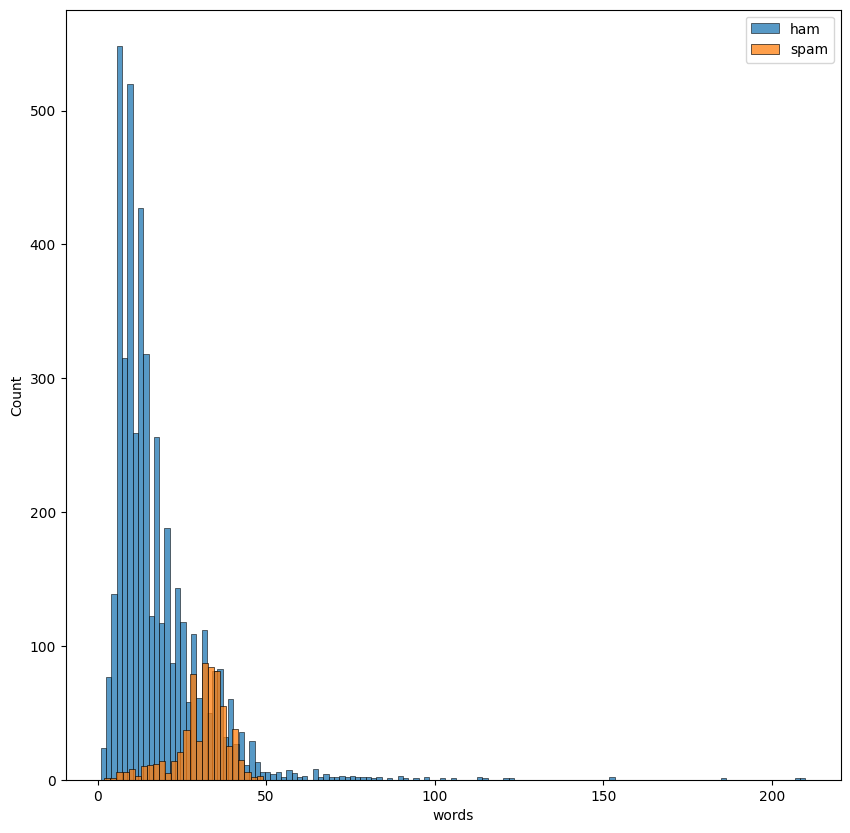

In [24]:
plt.figure(figsize=(10,10))
sns.histplot(df2[df2['target']==0]['words'])
sns.histplot(df2[df2['target']==1]['words'])
plt.legend(['ham','spam'])

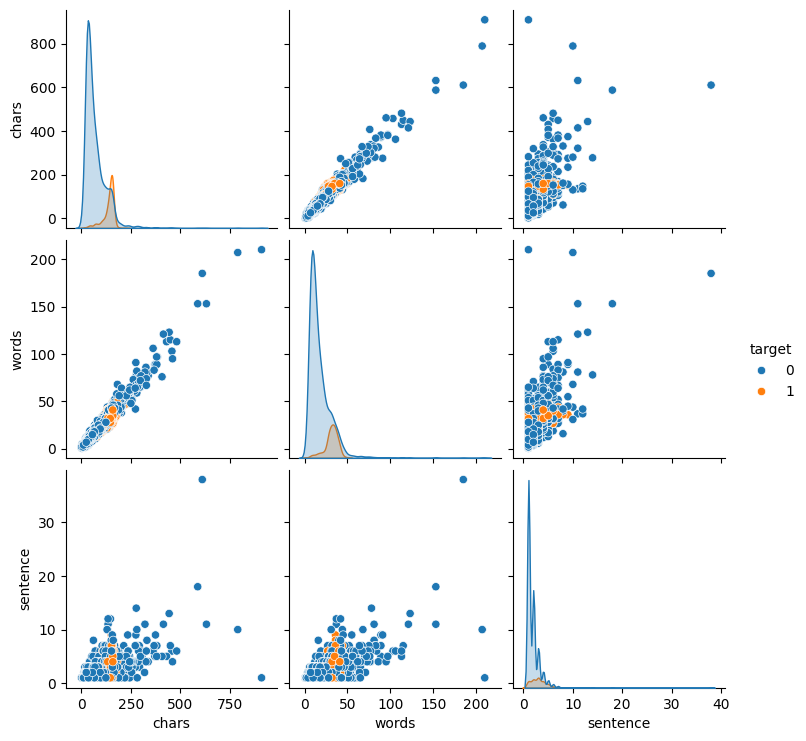

In [25]:
sns.pairplot(df2, hue='target')

<Axes: >

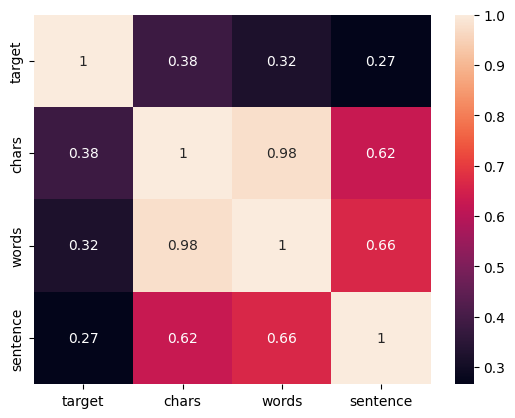

In [26]:
sns.heatmap(df2.drop(columns=['text']).corr(),annot=True)

## 3. Data Processing
<hr>

- Lower Case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [27]:
def transform_text(text):
    words = nltk.word_tokenize(text.lower())
    
    ps = PorterStemmer()
         
    return " ".join([ps.stem(word) for word in words if word.isalnum() and \
                    word not in stopwords.words('english')])

 


transform_text('I love Machine Learning')



'love machin learn'

In [28]:
df2['trans_text'] = df2['text'].apply(transform_text)

C:\Users\Krish\AppData\Local\Temp\ipykernel_8900\3854409776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['trans_text'] = df2['text'].apply(transform_text)


In [29]:
df2

,target,text,chars,words,sentence,trans_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,41,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,10,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,28,1,guy bitch act like interest buy someth els nex...


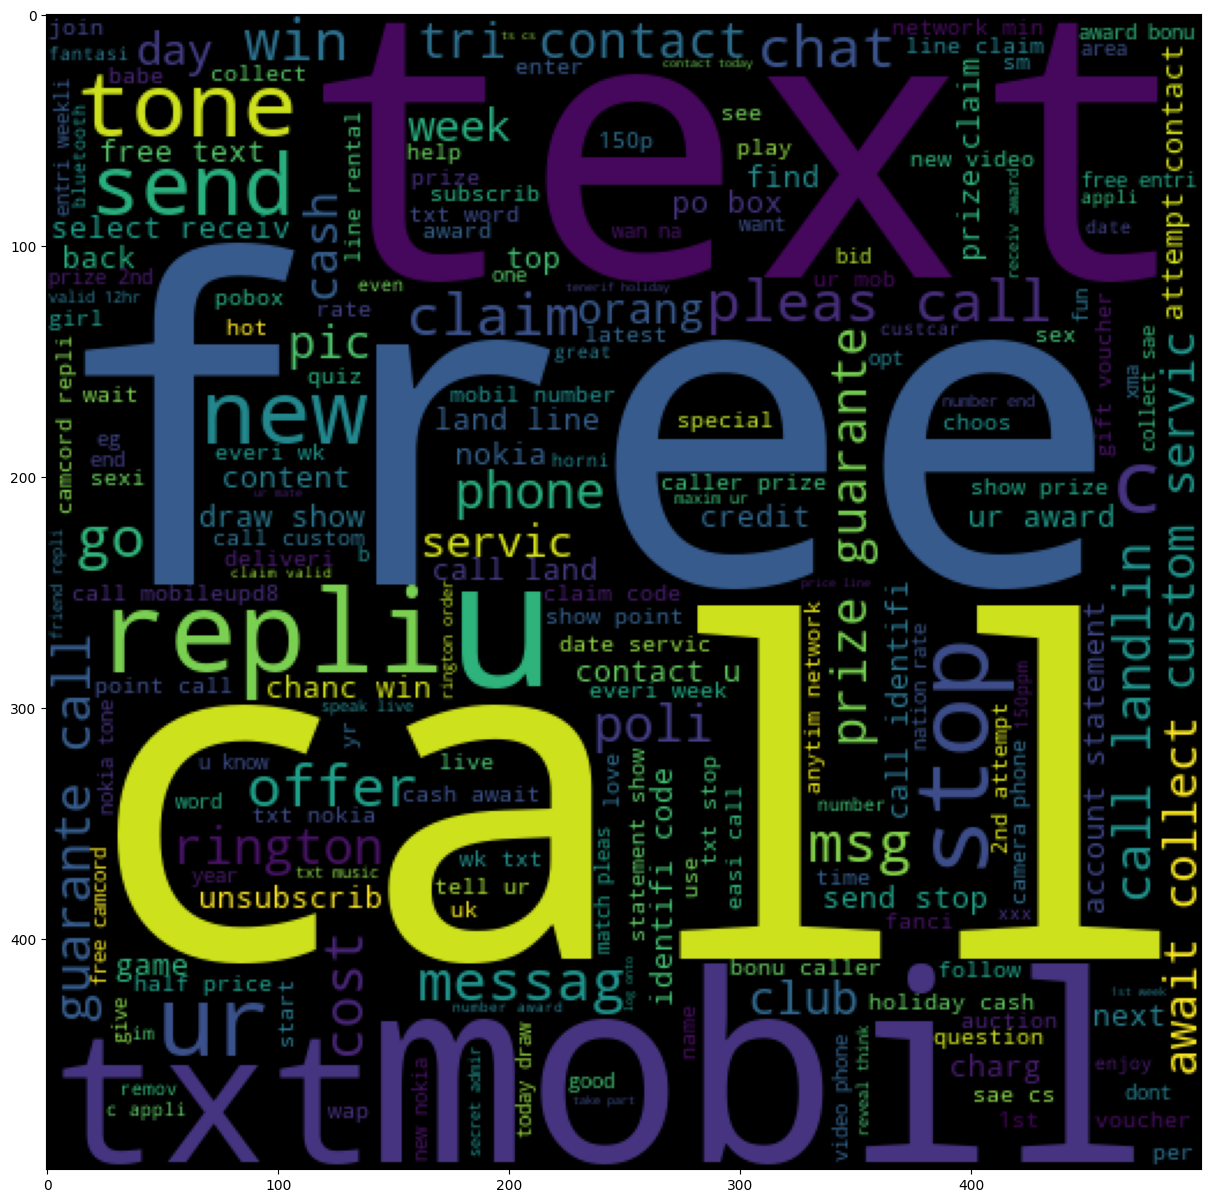

In [30]:
wc = WordCloud(width=500, height=500)
spam_wc = wc.generate(df2[df2['target'] == 1]['trans_text'].str.cat())
plt.figure(figsize=(15, 15))
plt.imshow(spam_wc)

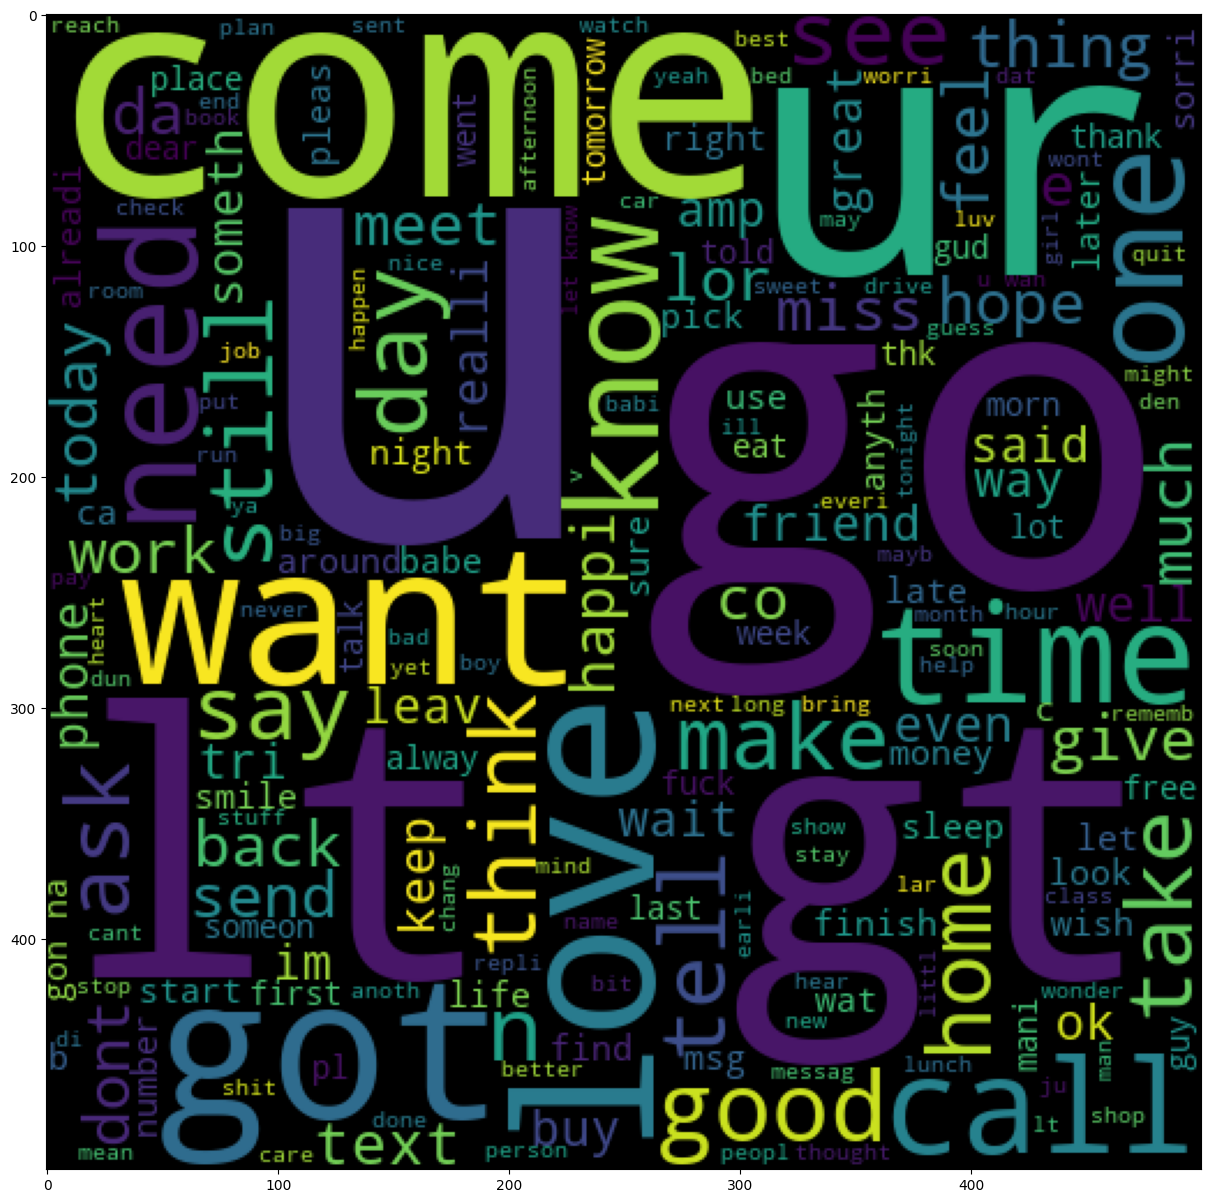

In [31]:
wc = WordCloud(width=500, height=500)
spam_wc = wc.generate(df2[df2['target'] == 0]['trans_text'].str.cat())
plt.figure(figsize=(15, 15))
plt.imshow(spam_wc)

In [32]:
spam_corpus = []
for msg in df2[df2['target'] == 1]['trans_text']:
    for word in msg.split():
        spam_corpus.append(word)
        
        
len(spam_corpus)

9941

C:\Users\Krish\AppData\Local\Temp\ipykernel_8900\600704233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_count['word'], y=spam_count['freq'], palette='rainbow')


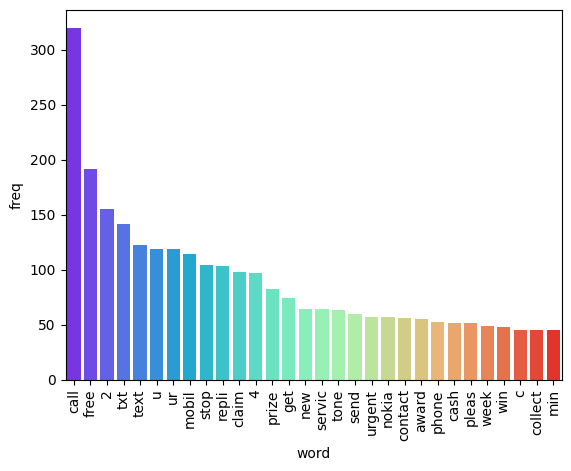

In [33]:
spam_count = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'freq'])


sns.barplot(x=spam_count['word'], y=spam_count['freq'], palette='rainbow')
plt.xticks(rotation='vertical')
plt.show()

In [34]:
spam_count

,word,freq
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


### 4. Model Building

In [35]:

cv = CountVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [36]:
X = tfid.fit_transform(df2['trans_text']).toarray()

In [37]:
X.shape

(5169, 3000)

In [38]:
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)
# X

# It just lowers the precicion so it will not be used

In [39]:
np.unique(X)


array([0.        , 0.03990001, 0.04601543, ..., 0.9786767 , 0.98003659,
       1.        ])

In [40]:
y = df2['target'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=10)

In [42]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [43]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[784 124]
 [ 19 107]]
0.46320346320346323


In [44]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9632495164410058
[[908   0]
 [ 38  88]]
1.0


In [45]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9758220502901354
[[908   0]
 [ 25 101]]
1.0


In [46]:
# tfidf --> mnb


In [47]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=20)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [48]:
clfs = {
    "SVC": svc,
    "KNC": knc,
    "MNB": mnb,
    "DTC": dtc,
    "LRC": lrc,
    "RFC": rfc,
    "ABC": abc,
    "BC": bc,
    "ETC": etc,
    "GBDT": gbdt,
    "XGB": xgb
}


In [49]:
def train_clf(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision
    

In [51]:
accuracy = []
precision = []

for name, clf in clfs.items():
    acc, pre = train_clf(clf, X_train, y_train, X_test, y_test)
    accuracy.append(acc)
    precision.append(pre)
    
print(accuracy)
print(precision)

[0.971953578336557, 0.9090909090909091, 0.9632495164410058, 0.9264990328820116, 0.9564796905222437, 0.9748549323017408, 0.9206963249516441, 0.9622823984526112, 0.9729206963249516, 0.9526112185686654, 0.965183752417795]
[0.98989898989899, 1.0, 1.0, 0.8048780487804879, 0.9764705882352941, 1.0, 0.782051282051282, 0.8782608695652174, 0.9803921568627451, 0.9873417721518988, 0.9411764705882353]


In [52]:
clf_names = [clf for clf in clfs]

clf_scores = pd.DataFrame({'Classifier':clf_names,
              'Accuracy':accuracy,
              'Precision':precision}).sort_values(['Precision', 'Accuracy'], ascending=False)

In [62]:
clf_scores

,Classifier,Accuracy,Precision
5,RFC,0.974855,1.000000
2,MNB,0.963250,1.000000
1,KNC,0.909091,1.000000
0,SVC,0.971954,0.989899
9,GBDT,0.952611,0.987342
8,ETC,0.972921,0.980392
4,LRC,0.956480,0.976471
10,XGB,0.965184,0.941176
7,BC,0.962282,0.878261
3,DTC,0.926499,0.804878


In [63]:
pickle.dump(tfid, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))